In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
df = pd.read_csv(r'C:\Users\Tejashwini Vemavarapu\Downloads\ai4i2020.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.10,308.60,1551,42.80,0,0,0,0,0,0,0
1,2,L47181,L,298.20,308.70,1408,46.30,3,0,0,0,0,0,0
2,3,L47182,L,298.10,308.50,1498,49.40,5,0,0,0,0,0,0
3,4,L47183,L,298.20,308.60,1433,39.50,7,0,0,0,0,0,0
4,5,L47184,L,298.20,308.70,1408,40.00,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.80,308.40,1604,29.50,14,0,0,0,0,0,0
9996,9997,H39410,H,298.90,308.40,1632,31.80,17,0,0,0,0,0,0
9997,9998,M24857,M,299.00,308.60,1645,33.40,22,0,0,0,0,0,0
9998,9999,H39412,H,299.00,308.70,1408,48.50,25,0,0,0,0,0,0


In [ ]:
df.describe

<bound method NDFrame.describe of         UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M               298.10                   308.60   
1         2     L47181    L               298.20                   308.70   
2         3     L47182    L               298.10                   308.50   
3         4     L47183    L               298.20                   308.60   
4         5     L47184    L               298.20                   308.70   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M               298.80                   308.40   
9996   9997     H39410    H               298.90                   308.40   
9997   9998     M24857    M               299.00                   308.60   
9998   9999     H39412    H               299.00                   308.70   
9999  10000     M24859    M               299.00                   308.70   

      Rotational speed [rpm]  Torque [Nm]

In [ ]:
# Selecting only the relevant columns
t_df = df.loc[:, ~df.columns.isin(['UDI','Product ID','TWF','HDF','PWF','OSF','RNF'])]

In [ ]:
t_df.head(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.10,308.60,1551,42.80,0,0
1,L,298.20,308.70,1408,46.30,3,0
2,L,298.10,308.50,1498,49.40,5,0
3,L,298.20,308.60,1433,39.50,7,0
4,L,298.20,308.70,1408,40.00,9,0


In [ ]:
# On-hot encoding the
t_df = pd.get_dummies(t_df, columns = ['Type'], drop_first=True).copy(deep = True)

In [ ]:
t_df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type_L,Type_M
0,298.10,308.60,1551,42.80,0,0,0,1
1,298.20,308.70,1408,46.30,3,0,1,0
2,298.10,308.50,1498,49.40,5,0,1,0
3,298.20,308.60,1433,39.50,7,0,1,0
4,298.20,308.70,1408,40.00,9,0,1,0
...,...,...,...,...,...,...,...,...
9995,298.80,308.40,1604,29.50,14,0,0,1
9996,298.90,308.40,1632,31.80,17,0,0,0
9997,299.00,308.60,1645,33.40,22,0,0,1
9998,299.00,308.70,1408,48.50,25,0,0,0


In [ ]:
t_df.columns  = ['Air temperature','Process temperature','Rotational speed','Torque','Tool wear','Machine failure','Type_L','Type_M']

In [ ]:
# Creating train and test sets for model building
X =  t_df.loc[:,t_df.columns != 'Machine failure']
y=  t_df['Machine failure']

X_t, X_te, y_t, y_te = train_test_split(X, y,test_size=.1,random_state =123)

In [ ]:
# Creating train and evalutaion set
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t,test_size=.2,random_state =123)

In [ ]:
# Perform PCA
pca = PCA(n_components=2)  # Choose the number of components to keep
X_pca = pca.fit_transform(t_df)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a logistic regression model on the PCA components
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 96.95%


In [ ]:
pca.explained_variance_ratio_

array([0.88755687, 0.11161912])

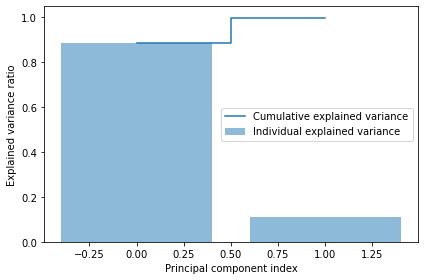

In [ ]:
%matplotlib inline
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# Apply SMOTE to the PCA-transformed data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_pca, y)

# Train a logistic regression model on the balanced data
clf = LogisticRegression()
clf.fit(X_smote, y_smote)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 59.45%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.59      0.74      1939
           1       0.04      0.61      0.08        61

    accuracy                           0.59      2000
   macro avg       0.51      0.60      0.41      2000
weighted avg       0.95      0.59      0.72      2000

Confusion Matrix:
[[1152  787]
 [  24   37]]


In [ ]:
# Apply RUS to the PCA-transformed data
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_pca, y)

# Train a logistic regression model on the balanced data
clf = LogisticRegression()
clf.fit(X_rus, y_rus)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 59.45%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.59      0.74      1939
           1       0.05      0.62      0.09        61

    accuracy                           0.59      2000
   macro avg       0.51      0.61      0.41      2000
weighted avg       0.95      0.59      0.72      2000

Confusion Matrix:
[[1151  788]
 [  23   38]]


In [ ]:
# Applying lazypredict to see the baseline estimates of model performance
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:07<00:00,  3.91it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.98               0.84     0.84      0.98   
BaggingClassifier                  0.98               0.83     0.83      0.98   
DecisionTreeClassifier             0.98               0.83     0.83      0.98   
XGBClassifier                      0.98               0.82     0.82      0.98   
NearestCentroid                    0.73               0.78     0.78      0.81   
RandomForestClassifier             0.98               0.76     0.76      0.98   
AdaBoostClassifier                 0.97               0.75     0.75      0.97   
ExtraTreeClassifier                0.96               0.70     0.70      0.96   
LinearDiscriminantAnalysis         0.97               0.69     0.69      0.96   
ExtraTreesClassifier               0.98               0.69     0.69      0.97   
LabelSpreading              

# From the above results we can see XGBoost Random Forest and Decision Trees Classification algorithms are performing well

## Going ahead with the above alogithmic experimentation

In [ ]:
X_train

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Type_L,Type_M
3843,0.78,0.68,0.03,0.77,0.68,1,0
2535,0.40,0.38,0.18,0.48,0.30,1,0
1609,0.26,0.25,0.23,0.43,0.13,1,0
4621,0.84,0.68,0.09,0.65,0.71,1,0
9231,0.32,0.42,0.21,0.45,0.54,1,0
...,...,...,...,...,...,...,...
5059,0.93,0.88,0.14,0.61,0.80,1,0
4257,0.79,0.65,0.24,0.48,0.50,0,1
9987,0.38,0.36,0.19,0.46,0.85,0,1
2100,0.43,0.44,0.17,0.58,0.17,0,1


In [ ]:
# Perfoming feature scaling using Normalization technique.
scaler = MinMaxScaler()
scaler.fit(X_train.loc[:, ~X_train.columns.isin(['Type_L','Type_M'])])

MinMaxScaler()

In [ ]:
X_train

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Type_L,Type_M
3843,0.78,0.68,0.03,0.77,0.68,1,0
2535,0.40,0.38,0.18,0.48,0.30,1,0
1609,0.26,0.25,0.23,0.43,0.13,1,0
4621,0.84,0.68,0.09,0.65,0.71,1,0
9231,0.32,0.42,0.21,0.45,0.54,1,0
...,...,...,...,...,...,...,...
5059,0.93,0.88,0.14,0.61,0.80,1,0
4257,0.79,0.65,0.24,0.48,0.50,0,1
9987,0.38,0.36,0.19,0.46,0.85,0,1
2100,0.43,0.44,0.17,0.58,0.17,0,1


In [ ]:
# Transforming the X_train
X_train.loc[:, ~X_train.columns.isin(['Type_L','Type_M'])] = scaler.transform(X_train.loc[:, ~X_train.columns.isin(['Type_L','Type_M'])])

In [ ]:
# Apply modelling
model = XGBClassifier()

# Add silent=True to avoid printing out updates with each cycle
model.fit(X_train, y_train, verbose=True)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Transforming the X_test
X_test.loc[:, ~X_test.columns.isin(['Type_L','Type_M'])] = scaler.transform(X_test.loc[:, ~X_test.columns.isin(['Type_L','Type_M'])])

In [ ]:
predictions = model.predict(X_test)

In [ ]:
accuracy_score(predictions,y_test)

0.9822222222222222

In [ ]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1748
           1       0.65      0.85      0.73        52

    accuracy                           0.98      1800
   macro avg       0.82      0.92      0.86      1800
weighted avg       0.99      0.98      0.98      1800



In [ ]:
# Predictions on test set
# Transforming the X_test
X_te.loc[:, ~X_te.columns.isin(['Type_L','Type_M'])] = scaler.transform(X_te.loc[:, ~X_te.columns.isin(['Type_L','Type_M'])])

In [ ]:
predictions = model.predict(X_te)
accuracy_score(predictions,y_te)


0.98

In [ ]:
print(classification_report(predictions, y_te))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       979
           1       0.52      0.76      0.62        21

    accuracy                           0.98      1000
   macro avg       0.76      0.87      0.80      1000
weighted avg       0.98      0.98      0.98      1000



In [ ]:
# Applying Random Forest Classifier
rf = RandomForestClassifier(max_depth=3, random_state=0)
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
print("Accuracy score: ",accuracy_score(predictions,y_test))
print(classification_report(predictions, y_test))

Accuracy score:  0.9683333333333334
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1785
           1       0.19      0.87      0.31        15

    accuracy                           0.97      1800
   macro avg       0.60      0.92      0.65      1800
weighted avg       0.99      0.97      0.98      1800



In [ ]:
# Test set predictions
predictions = rf.predict(X_te)
print("Accuracy",accuracy_score(predictions,y_te))
print(classification_report(predictions, y_te))

Accuracy 0.969
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       998
           1       0.03      0.50      0.06         2

    accuracy                           0.97      1000
   macro avg       0.52      0.73      0.52      1000
weighted avg       1.00      0.97      0.98      1000



In [ ]:
# Applying Random Forest Classifier
rf = RandomForestClassifier(max_depth=5, random_state=0)
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
print("Accuracy score: ",accuracy_score(predictions,y_test))
print(classification_report(predictions, y_test))

Accuracy score:  0.9711111111111111
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1780
           1       0.26      0.90      0.41        20

    accuracy                           0.97      1800
   macro avg       0.63      0.94      0.70      1800
weighted avg       0.99      0.97      0.98      1800



In [ ]:
# Test set predictions
predictions = rf.predict(X_te)
print("Accuracy",accuracy_score(predictions,y_te))
print(classification_report(predictions, y_te))

Accuracy 0.97
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       997
           1       0.06      0.67      0.12         3

    accuracy                           0.97      1000
   macro avg       0.53      0.82      0.55      1000
weighted avg       1.00      0.97      0.98      1000



In [ ]:
# Applying Random Forest Classifier
rf = RandomForestClassifier(max_depth=7, random_state=0)
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
print("Accuracy score: ",accuracy_score(predictions,y_test))
print(classification_report(predictions, y_test))

Accuracy score:  0.9733333333333334
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1776
           1       0.32      0.92      0.48        24

    accuracy                           0.97      1800
   macro avg       0.66      0.95      0.73      1800
weighted avg       0.99      0.97      0.98      1800



In [ ]:
# Test set predictions
predictions = rf.predict(X_te)
print("Accuracy",accuracy_score(predictions,y_te))
print(classification_report(predictions, y_te))

Accuracy 0.975
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       992
           1       0.23      0.88      0.36         8

    accuracy                           0.97      1000
   macro avg       0.61      0.93      0.67      1000
weighted avg       0.99      0.97      0.98      1000



In [ ]:
# Applying Random Forest Classifier
rf = RandomForestClassifier(max_depth=1, random_state=0)
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
print("Accuracy score: ",accuracy_score(predictions,y_test))
print(classification_report(predictions, y_test))

Accuracy score:  0.9622222222222222
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1800
           1       0.00      0.00      0.00         0

    accuracy                           0.96      1800
   macro avg       0.50      0.48      0.49      1800
weighted avg       1.00      0.96      0.98      1800



In [ ]:
# Test set predictions
predictions = rf.predict(X_te)
print("Accuracy",accuracy_score(predictions,y_te))
print(classification_report(predictions, y_te))

Accuracy 0.969
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1000
           1       0.00      0.00      0.00         0

    accuracy                           0.97      1000
   macro avg       0.50      0.48      0.49      1000
weighted avg       1.00      0.97      0.98      1000



In [ ]:
# Applying decision tree classifier
dt = DecisionTreeClassifier(random_state=0)

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
predictions = dt.predict(X_test)

In [ ]:
accuracy_score(predictions,y_test)

0.9744444444444444

In [ ]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1730
           1       0.68      0.66      0.67        70

    accuracy                           0.97      1800
   macro avg       0.83      0.82      0.83      1800
weighted avg       0.97      0.97      0.97      1800



In [ ]:
# Test set predictions
predictions = dt.predict(X_te)
print("Accuracy",accuracy_score(predictions,y_te))
print(classification_report(predictions, y_te))

Accuracy 0.978
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       973
           1       0.58      0.67      0.62        27

    accuracy                           0.98      1000
   macro avg       0.79      0.83      0.80      1000
weighted avg       0.98      0.98      0.98      1000



In [ ]:
#  Applying AdaBoost classifier
ada_clf = AdaBoostClassifier( random_state=42)

In [ ]:
# Train classifier on training set
ada_clf.fit(X_train, y_train)

# Test classifier on test set
y_pred = ada_clf.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.9722222222222222


In [ ]:
print("Classification report: \n", classification_report(y_test, y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1732
           1       0.67      0.51      0.58        68

    accuracy                           0.97      1800
   macro avg       0.83      0.75      0.78      1800
weighted avg       0.97      0.97      0.97      1800



In [ ]:
# Test set predictions
predictions = ada_clf.predict(X_te)
print("Accuracy",accuracy_score(predictions,y_te))
print(classification_report(predictions, y_te))

Accuracy 0.974
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       981
           1       0.39      0.63      0.48        19

    accuracy                           0.97      1000
   macro avg       0.69      0.81      0.73      1000
weighted avg       0.98      0.97      0.98      1000



In [ ]:
# Applying Kneighborsclassifier with KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training data
knn.fit(X_train, y_train)

# Generate predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy score
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9683333333333334


In [ ]:
# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1732
           1       0.72      0.26      0.39        68

    accuracy                           0.97      1800
   macro avg       0.85      0.63      0.69      1800
weighted avg       0.96      0.97      0.96      1800



In [ ]:
# Test set predictions
predictions = knn.predict(X_te)
print("Accuracy",accuracy_score(predictions,y_te))
print(classification_report(predictions, y_te))

Accuracy 0.969
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       992
           1       0.13      0.50      0.21         8

    accuracy                           0.97      1000
   macro avg       0.56      0.74      0.59      1000
weighted avg       0.99      0.97      0.98      1000



In [ ]:
# choosing XGBoost Algorithm according to the performance

In [ ]:
# predict probabilities on test set
y_pred_prob = model.predict_proba(X_te)[:, 1]
# calculate false positive rate, true positive rate, and AUC
fpr, tpr, thresholds = roc_curve(y_te, y_pred_prob)
roc_auc = auc(fpr, tpr)

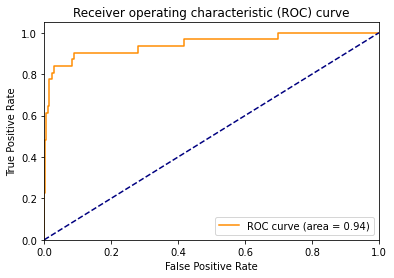

In [ ]:
# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Confusion Matrix:
 [[1725    7]
 [  50   18]]
